# Kurs NumPy 2021

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# The basics
Plot $f(x) = \sin (\pi x)$ for $x \in [-1, 1]$, med 120 punkter på x-aksen.
Linja skal i legenden være ført opp som $f(x)$.

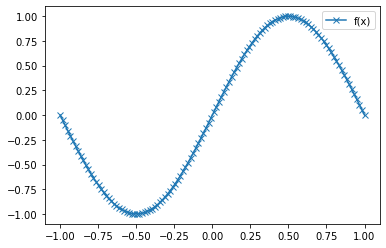

In [2]:
## Plotting a 1D function
x = np.linspace(-1, 1, 120)
plt.plot(x, np.sin(np.pi * x), "-x", label="f(x)")
plt.legend()
plt.show()

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]
[-1.22464680e-16 -6.42787610e-01 -9.84807753e-01 -8.66025404e-01
 -3.42020143e-01  3.42020143e-01  8.66025404e-01  9.84807753e-01
  6.42787610e-01  1.22464680e-16]


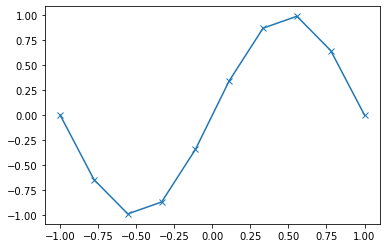

In [3]:
x = np.linspace(-1, 1, 10)
print(x)
print(np.sin(np.pi * x))
plt.plot(x, np.sin(np.pi * x), "-x")

# Oppgave 2 - Matriser
```Python
data = np.arange(1, 21).reshape((10, 2))
```
data har nå ti rader og to kolonner.
Hent ut, ved å bruke slicing, andre kolonne av data (dette skal være en array som begynner med 2).

In [4]:
data = np.arange(1, 21).reshape((10, 2))
data[:, 0]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

_Ekstra_: 
```Python
data2 = np.arange(1, 41).reshape((10, 4))
"""data2:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]
 [25 26 27 28]
 [29 30 31 32]
 [33 34 35 36]
 [37 38 39 40]]
"""
```
data2 har nå ti rader og fire kolonner.
Hent ut, ved bruk av slicing, den "indre matrisen" som er data2 der man tar vekk ytterkantene.
Altså 8x2 matrisen som her 6, 7 som første rad og 34 35 som siste rad.

_Hint:_ `list[-1]` gir siste element i en liste.

In [5]:
data2 = np.arange(1, 41).reshape((10, 4))
data2[1:-1, 1:-1]

array([[ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19],
       [22, 23],
       [26, 27],
       [30, 31],
       [34, 35]])

# Oppgave 3 - Stepping it up
Vi skal nå gjøre det litt mer komplisert.
La oss se på $f(x,y) = \sin(x\cdot y)$.
Vi ønsker å finne ut av hvordan denne funksjonen ser ut for ulike x og y.
Vi kunne ha skrevet en dobbelt for-løkke, men det kan ta veldig lang tid å kjøre når x- og y-listene blir lange.
Vi ønsker derfor å regne ut dette ved hjelp av NumPy og meshgrid.

Lag en to-dimensjonal liste som er f(x,y) for
x mellom 0 og 10, og y er mellom 20 og 100.

In [6]:
x = np.linspace(0, 10, 40)
y = np.linspace(20, 100, 200)
xx, yy = np.meshgrid(x, y)

f = np.sin(xx*yy)

# Oppgave 4 - Plotting i 2D
Plot $f$ fra forrige oppgave med en heatplot.
Inkluder en colorbar.

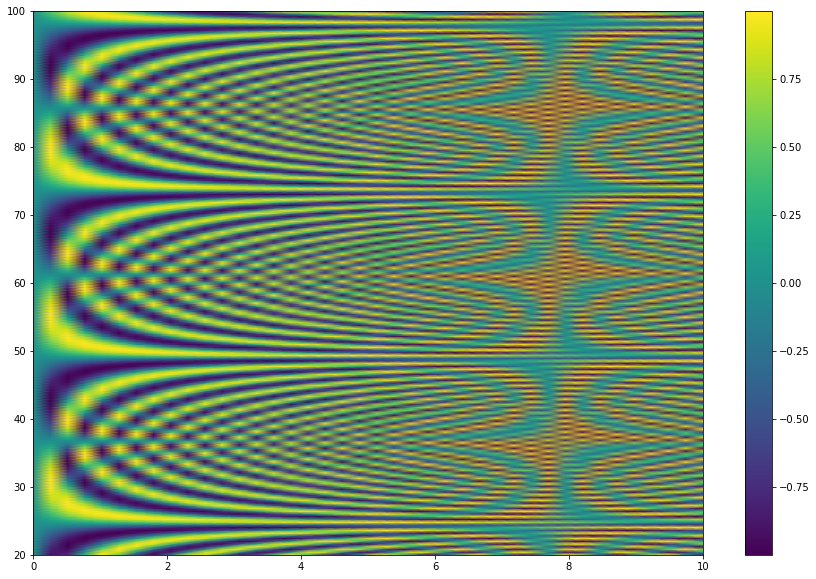

In [7]:
plt.figure(figsize=(15, 10))
plt.pcolormesh(xx, yy, f, shading='gouraud')
plt.colorbar()
#plt.imshow(f)

-----

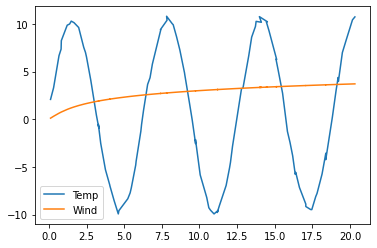

In [8]:
time, temp, wind = np.loadtxt("my_data.txt", unpack=True)
plt.plot(time, temp, label="Temp")
plt.plot(time, wind, label="Wind")
plt.legend()

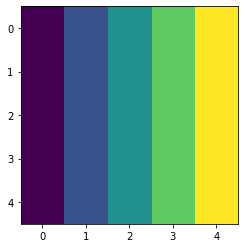

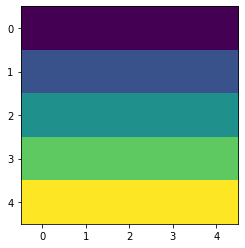

In [9]:
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)


def f(x, y):
    return 1 / (1 + x + y)


xx, yy = np.meshgrid(x, y)
plt.imshow(xx)
plt.show()
plt.figure()
plt.imshow(yy)

-------

<ipython-input-10-506d9f21a2c8>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx[4:, :], yy[4:, :], f(xx[4:, :], yy[4:, :]))


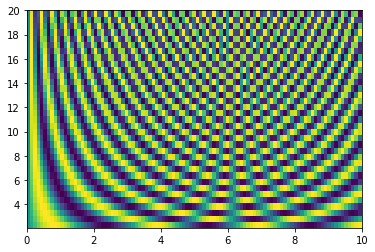

In [10]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 20, 40)
xx, yy = np.meshgrid(x, y)

def f(x, y):
    return np.sin(x*y)

plt.pcolormesh(xx[4:, :], yy[4:, :], f(xx[4:, :], yy[4:, :]))

Vi skal se på Laplacelikningen, som for eksempel kan beskrive et potensialfelt uten kilder.
$$
\nabla^2 V = \frac{\partial^2}{\partial x^2} V + \frac{\partial^2}{\partial y^2} V = 0,
$$
med grensebetingelser 
- $V(0,y) = V_0$,
- $V(L, y) = 0$,
- $V(x,0) = V(x,L)$.

<center>
    <img width="300px" src="figure.png" />
</center>

Ved å skrive om den dobbeltderiverte med endelige differanser, får vi
$$
V(x_i, y_j) = \frac{1}{4}\big[ V(x_{i-1},y_j) + V(x_{i+1},y_j) + V(x_i,y_{j-1}) + V(x_i,y_{j+1})\big].
$$


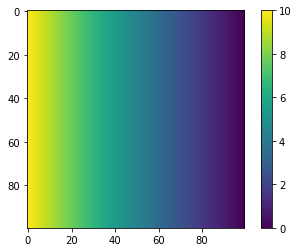

In [11]:
def initial_v(N, v0):
    v = np.zeros((N, N))
    v[:, 0] = v0
    return v

num_iterations = 10000
N = 100
v0 = 10

v = initial_v(N, v0)

for i in range(num_iterations):
    v_left = v[:, 0:-2]
    v_right = v[:, 2:]
    v_up = np.roll(v, 1, axis=0)[:, 1:-1]
    v_down = np.roll(v[:, 1:-1], -1, axis=0)
    
    v[:, 1:-1] = 1/4 * (v_left + v_right + v_up + v_down)
    
plt.imshow(v)
plt.colorbar()

----

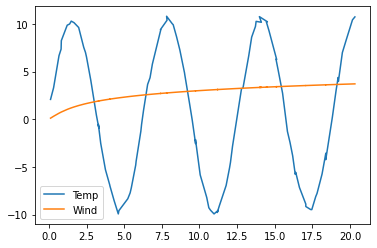

In [12]:
time, temp, wind = np.loadtxt('my_data.txt', unpack=True)
plt.plot(time, temp, label="Temp")
plt.plot(time, wind, label="Wind")
plt.legend()